# Recomendación Producto de Inversión y Ahorro

Para este segundo modelo, vamos a enfocarnos en **recomendar un producto de ahorro o inversión** como muestra de que nuestro enfoque de machine learning es adaptable a diferentes tipos de productos financieros. Esto nos permitirá demostrar que, con los datos de contratación suficientes, podemos ajustar el modelo para predecir la probabilidad de adquisición de productos específicos, tanto de ahorro como de inversión. Si bien la campaña de marketing está centrada en el producto de **tarjeta de crédito** (un producto de financiación), también es crucial mostrar la flexibilidad del modelo para futuras campañas.

A continuación, justificamos la selección del producto de inversión/ahorro y los motivos detrás de este segundo modelo:

### 1. Producto representativo de ahorro/inversión
En este caso, **el producto objetivo será el más representativo dentro de la categoría de ahorro e inversión**, seleccionándolo en base a su frecuencia de contratación en nuestra base de datos. Los productos de ahorro e inversión son fundamentales para los clientes que buscan estabilidad financiera a largo plazo, y su contratación puede generar importantes ingresos para la compañía. Según la información proporcionada, la rentabilidad por cada producto de ahorro o inversión vendido es de **40€**, lo que convierte a esta categoría en una fuente valiosa de ingresos recurrentes.

### 2. Adaptabilidad del modelo
Al crear un segundo modelo de machine learning centrado en los productos de ahorro e inversión, mostramos la **adaptabilidad del enfoque predictivo** para ajustarse a diferentes objetivos de negocio. El proceso seguirá una metodología similar a la del modelo de tarjeta de crédito, utilizando como **target** una variable que refleje si el cliente ha contratado algún producto de ahorro/inversión en el pasado.

### 3. Priorización de productos más rentables
Aunque el objetivo principal de la campaña actual es la tarjeta de crédito, la implementación de este segundo modelo nos permite **explorar nuevos productos que puedan generar altos ingresos en el futuro**. De este modo, la empresa puede diversificar su estrategia de marketing y maximizar la rentabilidad no solo con productos de financiación, sino también con productos de ahorro e inversión, que tienen un perfil de cliente más específico.

### 4. Captura del comportamiento histórico
Al igual que con el modelo de tarjeta de crédito, la **captura del comportamiento histórico del cliente** es clave. La creación de una variable de "venta" (`sale`) para el producto de inversión/ahorro elegido consolidará el historial de contratación y permitirá al modelo predecir mejor qué clientes están más inclinados a adquirir estos productos en el futuro.

### 5. Focalización de la campaña y optimización de recursos
El modelo de recomendación para productos de inversión/ahorro permitirá al equipo de marketing enfocar sus esfuerzos en aquellos clientes con mayor probabilidad de conversión. **Este enfoque asegura que se maximice el ROI en campañas futuras**, mejorando la eficiencia al identificar clientes que ya han mostrado interés en productos financieros a largo plazo.

---

En resumen, este segundo modelo de recomendación para productos de ahorro e inversión no solo demuestra la versatilidad y adaptabilidad del enfoque predictivo, sino que también permite a la compañía explorar **nuevas oportunidades de negocio** al ofrecer productos con alta rentabilidad a clientes específicos



# Generar el modelo

## 1. Importar librerias

In [1]:
import numpy as np 
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

## 2. Leer datos de AWS

In [2]:
df_full = pd.read_parquet("https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/df_full_cleaned.parquet")
df_full

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,1,January,Adultos jóvenes,"87,218.100",Málaga,2018-01-12,Otros,1,02 - PARTICULARES,1-2 años
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"35,548.740",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"122,179.110",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,1,January,Jóvenes,"119,775.540",Zaragoza,2015-08-10,KHD,0,03 - UNIVERSITARIO,Más de 3 años
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"101,469.135",Zaragoza,2015-08-10,KHE,1,03 - UNIVERSITARIO,Más de 3 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"43,912.170",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"87,930.930",Zaragoza,2016-08-14,KHE,1,02 - PARTICULARES,2-3 años
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Jóvenes,"199,592.820",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años


## 3. Función para el cálculo de ventas históricas

In [3]:
def calculate_historical_sales(df, product_columns):
    # Crear un DataFrame temporal con solo las columnas de productos
    df_products = df[product_columns]
    
    # Calcular la suma de cada producto por cliente
    product_sums = df_products.groupby(df['pk_cid']).sum()
    
    # Convertir las sumas a 1 (si > 0) o 0
    product_sales = (product_sums > 0).astype(int)
    
    # Renombrar las columnas
    product_sales.columns = [f'sale_{col}' for col in product_sales.columns]
    
    # Fusionar los resultados con el DataFrame original
    return df.merge(product_sales, left_on='pk_cid', right_index=True, how='left')

# Lista de productos
product_columns = [
    'credit_card', 'short_term_deposit', 'loans', 'mortgage', 'funds',
    'securities', 'long_term_deposit', 'em_account_pp', 'payroll',
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
    'em_account_p', 'em_acount'  # Nota: corregí 'em_acount' que estaba mal escrito en el original
]

# Aplicar la función
df_full = calculate_historical_sales(df_full, product_columns)

In [4]:
df_full.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,1,January,Adultos jóvenes,"87,218.100",Málaga,2018-01-12,Otros,1,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"35,548.740",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"122,179.110",Ciudad Real,2015-08-10,KHE,0,03 - UNIVERSITARIO,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,1,January,Jóvenes,"119,775.540",Zaragoza,2015-08-10,KHD,0,03 - UNIVERSITARIO,Más de 3 años,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"101,469.135",Zaragoza,2015-08-10,KHE,1,03 - UNIVERSITARIO,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# Comprobar en un cliente la funcion
df_full[df_full['pk_cid'] == 1167274]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
161673,1167274,2018-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,1,January,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
313183,1167274,2018-02-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,2,February,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
531223,1167274,2018-03-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,3,March,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
775879,1167274,2018-04-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,4,April,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1173970,1167274,2018-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1427338,1167274,2018-06-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,6,June,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1536602,1167274,2018-07-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,7,July,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2158307,1167274,2018-08-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,8,August,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2392691,1167274,2018-09-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,0,20,0,0,ES,V,9,September,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2647752,1167274,2018-10-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,0,20,0,0,ES,V,10,October,Jóvenes,"61,016.580",Salamanca,2016-08-19,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 54 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   pk_cid                   int64         
 1   pk_partition             datetime64[ns]
 2   short_term_deposit       int8          
 3   loans                    int8          
 4   mortgage                 int8          
 5   funds                    int8          
 6   securities               int8          
 7   long_term_deposit        int8          
 8   em_account_pp            int8          
 9   credit_card              int8          
 10  payroll                  int8          
 11  pension_plan             int8          
 12  payroll_account          int8          
 13  emc_account              int8          
 14  debit_card               int8          
 15  em_account_p             int8          
 16  em_acount                int8          
 17  num_products_contracts   in

## 4. Filtrar ultima particion

In [7]:
# Filtramos por la ultima particion
df_ultima_particion = df_full[df_full["pk_partition"] == "2019-05-28"]

In [8]:
# Filtramos el dataframe por la ultima visualizacion de cada cliente 
df = df_full.drop_duplicates(subset='pk_cid', keep='last').reset_index(drop=True)


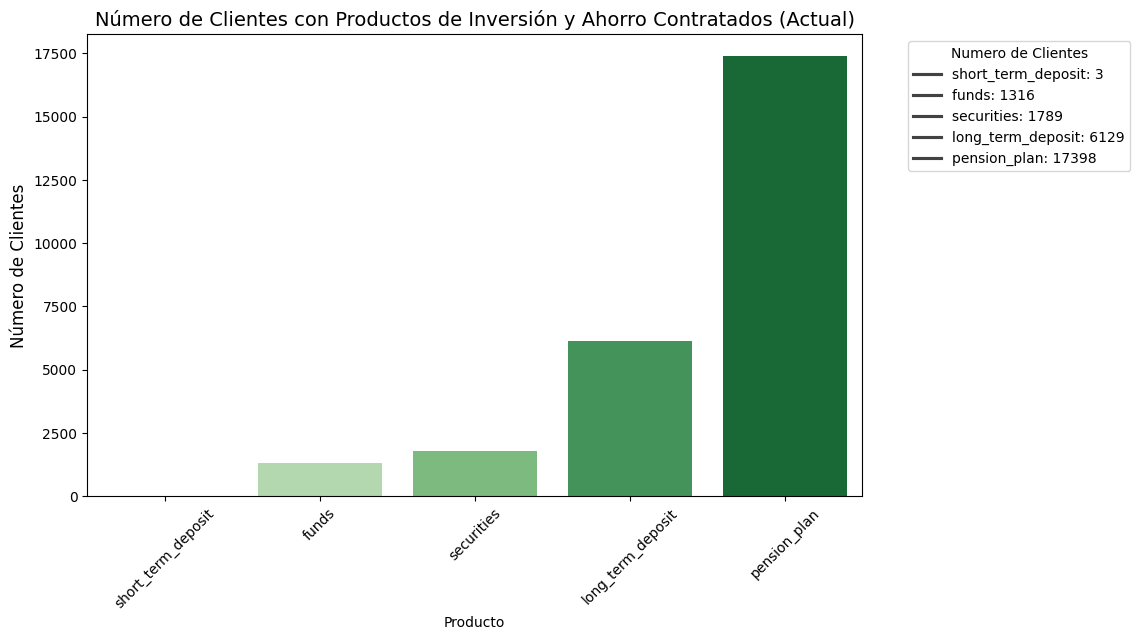

In [9]:
# Lista de productos de inversión y ahorro
inversion_products = ['short_term_deposit', 'funds', 'securities', 'long_term_deposit', 'pension_plan']


# Contar cuántos clientes tienen cada producto contratado (valor 1 en las columnas)
current_product_counts = df[inversion_products].sum()

# Crear DataFrames a partir de los resultados para ordenar
current_product_counts_df = pd.DataFrame(current_product_counts, columns=['Count']).reset_index()


# Renombrar la columna de índice para un mejor etiquetado
current_product_counts_df.columns = ['Producto', 'Count']

# Gráfico para productos actuales
plt.figure(figsize=(10, 6))
bar_current = sns.barplot(x='Producto', y='Count', data=current_product_counts_df, palette='Greens')
plt.title('Número de Clientes con Productos de Inversión y Ahorro Contratados (Actual)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)

# Añadir la leyenda con los conteos de manera sencilla
plt.legend([f'{row["Producto"]}: {row["Count"]}' for index, row in current_product_counts_df.iterrows()], 
        title='Numero de Clientes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



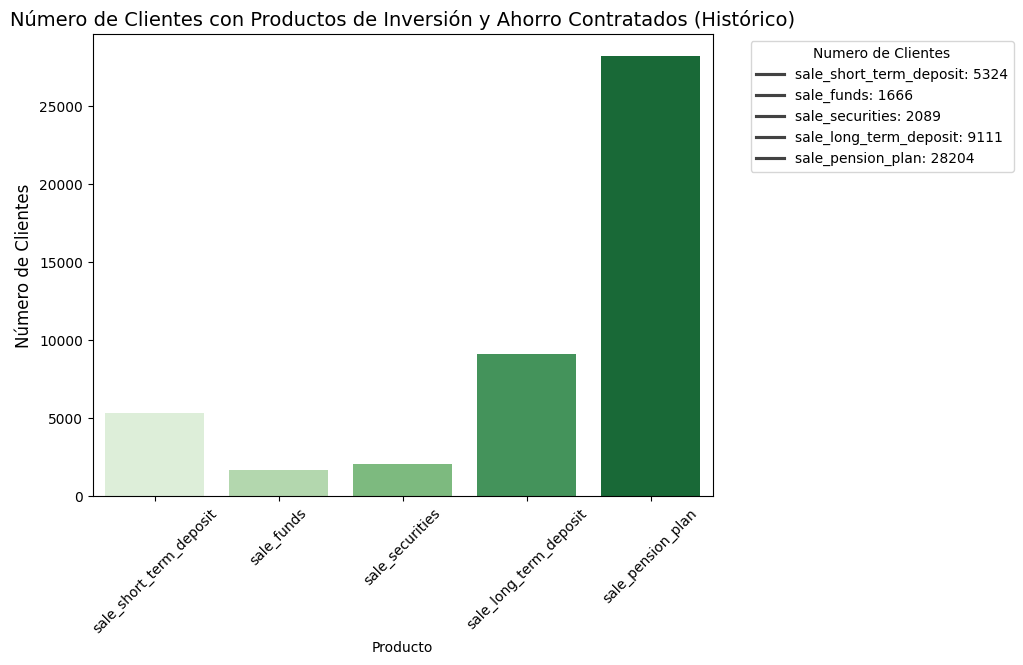

In [10]:
# Crear las columnas históricas (sale_)
historical_columns = [f'sale_{prod}' for prod in inversion_products]
# Contar cuántos clientes tienen cada producto contratado (valor 1 en las columnas)
historical_product_counts = df[historical_columns].sum()

# Crear DataFrames a partir de los resultados para ordenar
historical_product_counts_df = pd.DataFrame(historical_product_counts, columns=['Count']).reset_index()

# Renombrar la columna de índice para un mejor etiquetado
historical_product_counts_df.columns = ['Producto', 'Count']

# Gráfico para productos históricos
plt.figure(figsize=(8, 6))
sns.barplot(x='Producto', y='Count', data=historical_product_counts_df, palette='Greens')
plt.title('Número de Clientes con Productos de Inversión y Ahorro Contratados (Histórico)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
# Añadir la leyenda con los conteos de manera sencilla
plt.legend([f'{row["Producto"]}: {row["Count"]}' for index, row in historical_product_counts_df.iterrows()], 
        title='Numero de Clientes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


El producto más vendido en nuestra base de clientes es el pension_plan, con un total de 28,204 clientes que lo han contratado. Este alto número de contrataciones lo convierte en un producto significativo para nuestro análisis y modelado, ya que contar con una muestra amplia nos permite desarrollar un modelo más robusto y fiable.

La abundancia de datos sobre el sale_pension_plan es crucial, ya que nos ofrece una visión clara del comportamiento y las preferencias de nuestros clientes, lo que es esencial para la predicción de futuras contrataciones. Aunque es necesario realizar un undersampling para equilibrar la clase objetivo en el modelo, la riqueza de información disponible sobre este producto facilitará la identificación de patrones de comportamiento y tendencias en la contratación. Esto nos permitirá generar un modelo que no solo sea preciso, sino que también se adapte mejor a las necesidades de nuestro negocio.

In [11]:
df['pension_plan'].value_counts()

pension_plan
0    438975
1     17398
Name: count, dtype: int64

In [12]:
df_ultima_particion['pension_plan'].value_counts()

pension_plan
0    425642
1     17353
Name: count, dtype: int64

In [13]:
df['sale_pension_plan'].value_counts()

sale_pension_plan
0    428169
1     28204
Name: count, dtype: int64

In [14]:
df_ultima_particion['sale_pension_plan'].value_counts()

sale_pension_plan
0    415114
1     27881
Name: count, dtype: int64

## 5. Comprobar nulos y duplicados

In [15]:
df.isna().sum().sum()

0

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456373 entries, 0 to 456372
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   pk_cid                   456373 non-null  int64         
 1   pk_partition             456373 non-null  datetime64[ns]
 2   short_term_deposit       456373 non-null  int8          
 3   loans                    456373 non-null  int8          
 4   mortgage                 456373 non-null  int8          
 5   funds                    456373 non-null  int8          
 6   securities               456373 non-null  int8          
 7   long_term_deposit        456373 non-null  int8          
 8   em_account_pp            456373 non-null  int8          
 9   credit_card              456373 non-null  int8          
 10  payroll                  456373 non-null  int8          
 11  pension_plan             456373 non-null  int8          
 12  payroll_account 

## 6. Eliminar columnas

In [18]:
df.drop('entry_date', axis=1, inplace=True)
df.drop('em_account_pp', axis=1, inplace=True)
df.drop('sale_em_account_pp', axis=1, inplace=True)
df.drop('pension_plan', axis=1, inplace=True)
df.drop('country_id', axis=1, inplace=True)
df.drop('pk_partition', axis=1, inplace=True)
df.set_index('pk_cid', inplace=True)

In [19]:
df['entry_channel'].value_counts()

entry_channel
KHE      196594
KHQ       76168
KFC       60183
KHM       32262
KAT       27016
KHK       17070
KHN       16983
Otros     15769
KFA        5129
KHD        4860
RED        4339
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456373 entries, 635756 to 1550586
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   short_term_deposit       456373 non-null  int8    
 1   loans                    456373 non-null  int8    
 2   mortgage                 456373 non-null  int8    
 3   funds                    456373 non-null  int8    
 4   securities               456373 non-null  int8    
 5   long_term_deposit        456373 non-null  int8    
 6   credit_card              456373 non-null  int8    
 7   payroll                  456373 non-null  int8    
 8   payroll_account          456373 non-null  int8    
 9   emc_account              456373 non-null  int8    
 10  debit_card               456373 non-null  int8    
 11  em_account_p             456373 non-null  int8    
 12  em_acount                456373 non-null  int8    
 13  num_products_contracts   456373 non-null  i

## 7. Correlación de variables numéricas

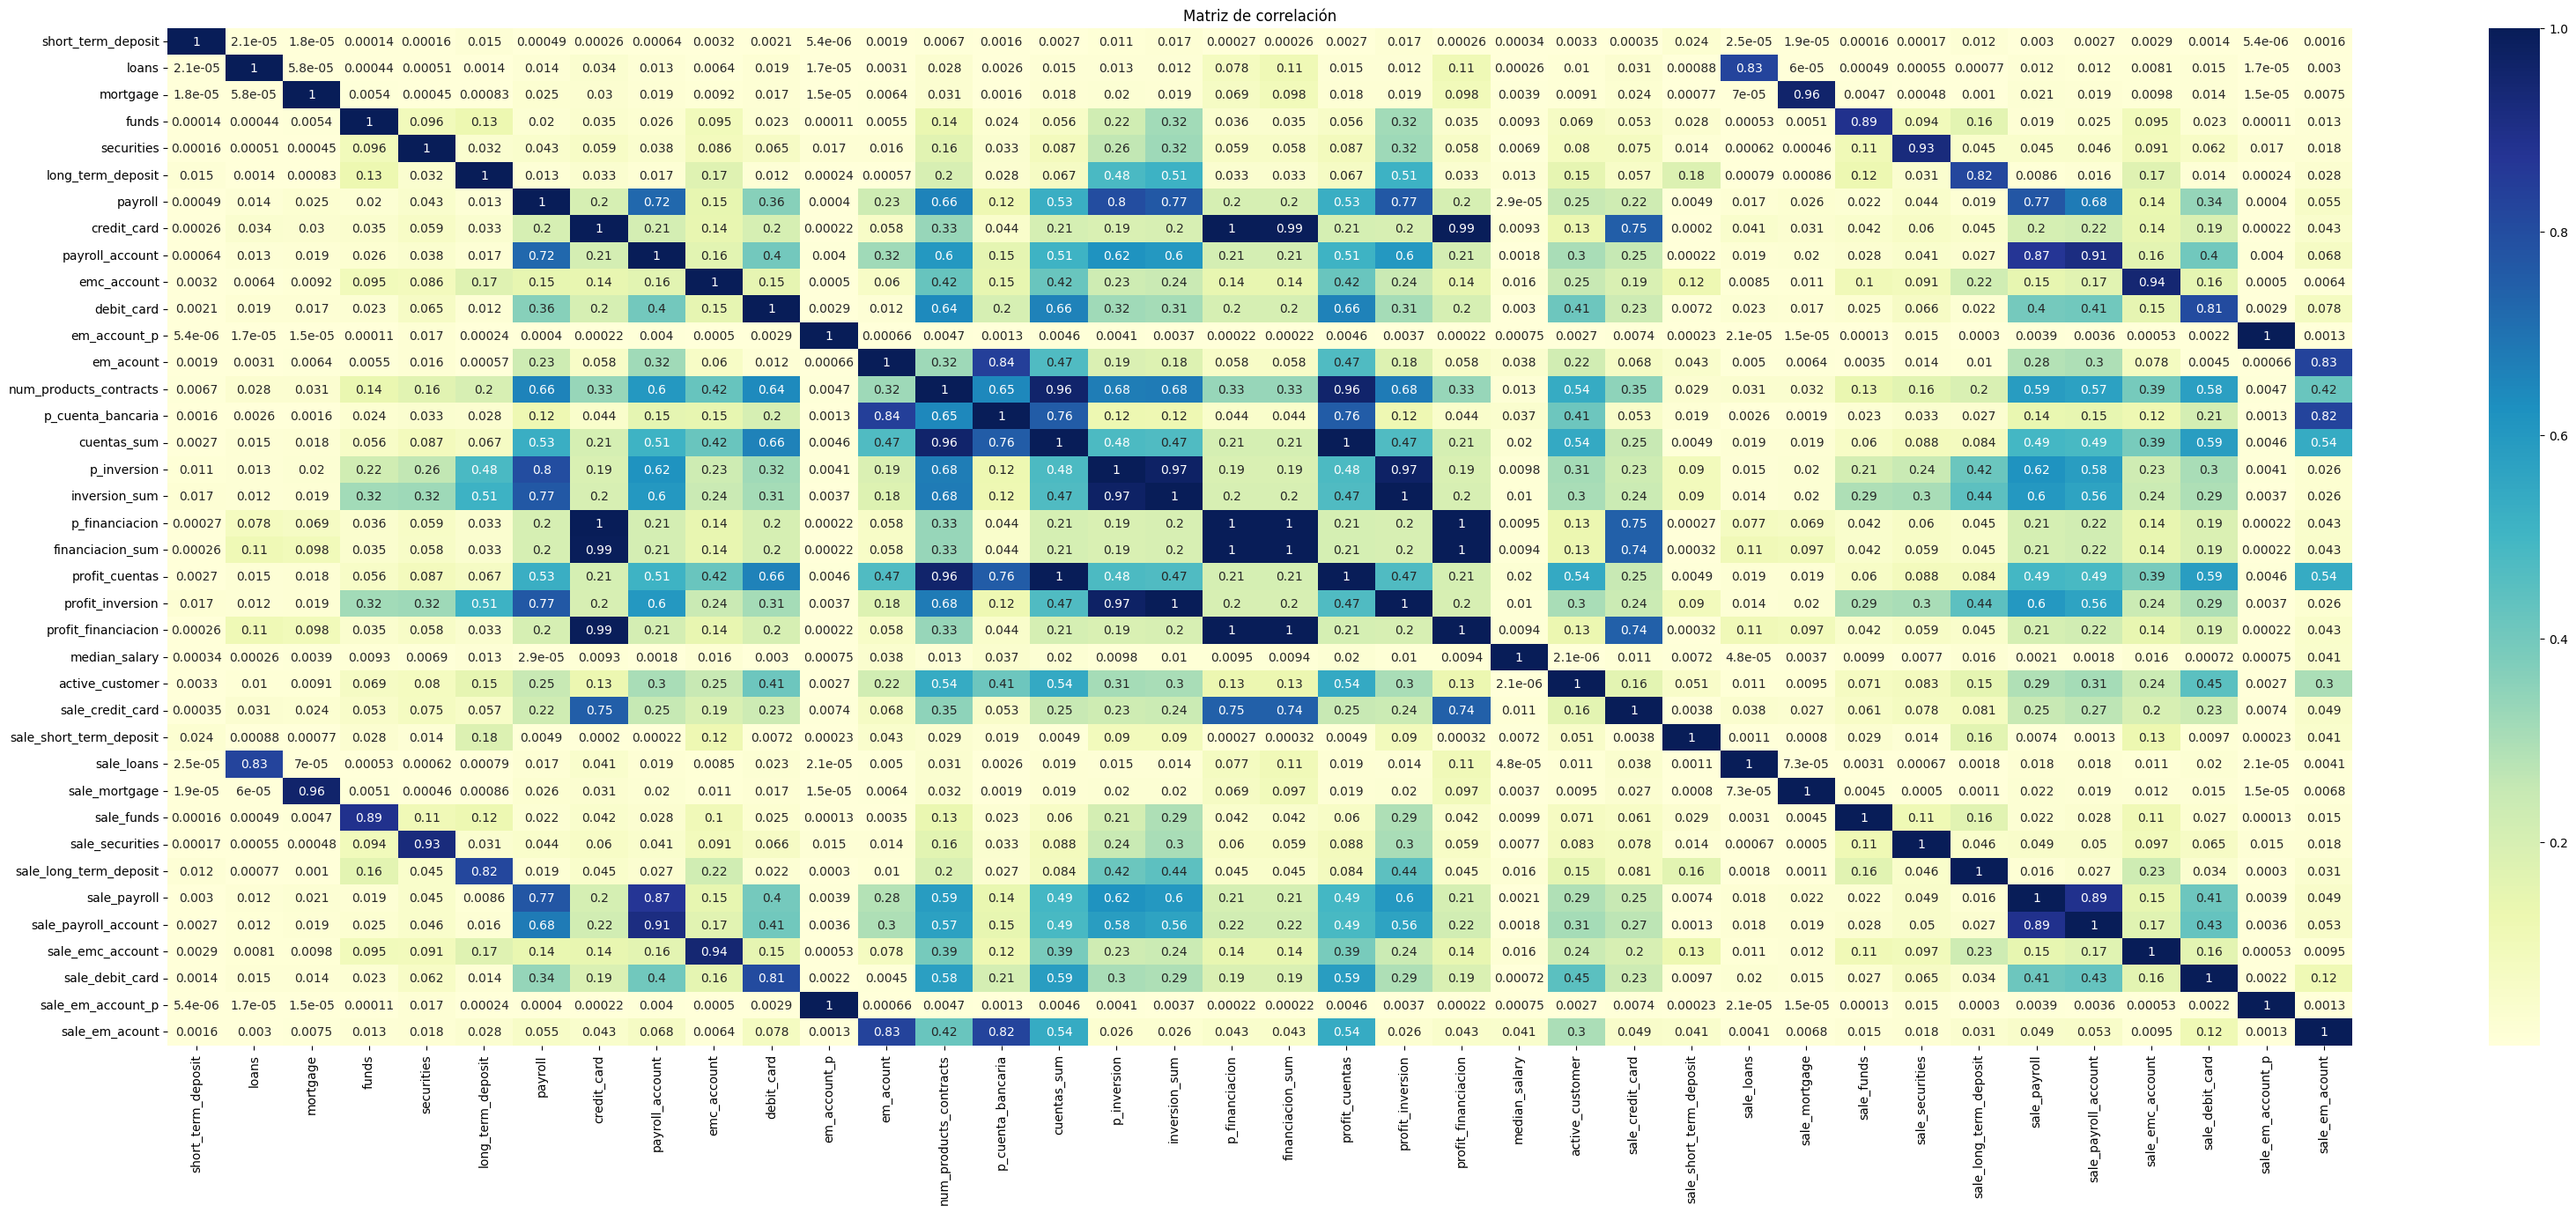

Columnas que no pasan al siguiente análisis debido a alta correlación: ['cuentas_sum', 'inversion_sum', 'p_financiacion', 'financiacion_sum', 'profit_cuentas', 'profit_inversion', 'profit_financiacion', 'sale_mortgage', 'sale_securities', 'sale_payroll_account', 'sale_emc_account', 'sale_em_account_p']


In [21]:
numerical_cols = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit',  'payroll', 'credit_card','payroll_account', 'emc_account', 'debit_card', 'em_account_p',
       'em_acount', 'num_products_contracts', 'p_cuenta_bancaria','cuentas_sum', 'p_inversion', 'inversion_sum', 'p_financiacion',
       'financiacion_sum', 'profit_cuentas', 'profit_inversion','profit_financiacion','median_salary','active_customer',
       'sale_credit_card', 'sale_short_term_deposit', 'sale_loans','sale_mortgage', 'sale_funds', 'sale_securities',
       'sale_long_term_deposit', 'sale_payroll', 'sale_payroll_account', 'sale_emc_account',
       'sale_debit_card', 'sale_em_account_p', 'sale_em_acount']

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = df[numerical_cols].corr().abs()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(40, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Matriz de correlación")
plt.show()

# Identificar columnas con correlación mayor a 0.90
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encuentra las columnas que tienen correlación > 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

# Eliminar columnas con alta correlación en el conjunto de entrenamiento
df = df.drop(columns=to_drop)

# Mostrar columnas eliminadas
print("Columnas que no pasan al siguiente análisis debido a alta correlación:", to_drop)

## 8. Separación de X e y

In [22]:
# Preparar las características (X) y la variable objetivo (y)
X = df.drop(columns=['sale_pension_plan'])
y = df['sale_pension_plan']


In [23]:
X

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,p_inversion,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_funds,sale_long_term_deposit,sale_payroll,sale_debit_card,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
635756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,V,7,July,Adultos,"118,183.410",Madrid,KAT,1,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,1
606127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,7,July,Longevos,"152,041.110",Madrid,KFA,0,03 - UNIVERSITARIO,1-2 años,0,0,0,0,1,0,0,0
611844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,7,July,Adultos jóvenes,"87,351.090",Málaga,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0
543177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,7,July,Adultos,"179,142.540",Madrid,Otros,0,03 - UNIVERSITARIO,1-2 años,0,0,0,0,0,0,0,0
528596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,V,7,July,Adultos jóvenes,"125,161.530",Madrid,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Jóvenes,"43,912.170",Zaragoza,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,1
1166764,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Jóvenes,"23,334.990","Rioja, La",KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,1,1
1166763,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,H,5,May,Adultos,"87,930.930",Zaragoza,KHE,1,02 - PARTICULARES,2-3 años,0,0,0,0,0,0,0,1


In [24]:
y.value_counts()

sale_pension_plan
0    428169
1     28204
Name: count, dtype: int64

## 9. Undersampling

In [25]:

# Crear un modelo de undersampling
undersampler = RandomUnderSampler(random_state=42)  # Establece un random seed para reproducibilidad
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [26]:
X_resampled

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,p_inversion,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_funds,sale_long_term_deposit,sale_payroll,sale_debit_card,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1079689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,V,5,May,Adultos jóvenes,"106,490.970",Burgos,KHE,0,03 - UNIVERSITARIO,Más de 3 años,0,0,0,0,0,0,0,0
1178807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,5,May,Jóvenes,"150,674.610",Barcelona,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0
1457123,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Jóvenes,"80,422.980","Palmas, Las",KHQ,0,03 - UNIVERSITARIO,6-9 meses,0,0,0,0,0,0,0,1
1387212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,V,5,May,Adultos jóvenes,"60,829.020",Albacete,KHK,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0
1389116,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,H,5,May,Adultos jóvenes,"125,161.530",Madrid,KFC,1,03 - UNIVERSITARIO,1-2 años,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166712,0,0,0,0,0,0,0,0,1,0,1,0,0,2,1,0,V,5,May,Adultos jóvenes,"93,346.470",Valencia,KHE,1,02 - PARTICULARES,2-3 años,0,0,0,0,0,1,1,0
1166666,0,0,0,0,0,0,0,1,1,0,1,0,0,4,1,1,H,5,May,Adultos jóvenes,"65,978.880",Valencia,KHE,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,1,1,0
1166633,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,V,5,May,Jóvenes,"194,392.020",Barcelona,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,1,0,1


In [27]:
y_resampled.value_counts()

sale_pension_plan
0    28204
1    28204
Name: count, dtype: int64

## 10. One-Hot Encoding de variables categóricas


In [28]:
# One-Hot Encoding para las variables categóricas
categorical_cols = X_resampled.select_dtypes(include=['object', 'category']).columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_ohe = pd.DataFrame(ohe.fit_transform(X_resampled[categorical_cols]), 
                    columns=ohe.get_feature_names_out(categorical_cols), index=X_resampled.index)


## 11. Escalado con RobustScaler de variables numéricas


In [29]:
# RobustScaler para las variables numéricas
numerical_cols = X_resampled.select_dtypes(include=['int64', 'float64','int32','int8']).columns
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_resampled[numerical_cols]), 
                        columns=numerical_cols, index=X_resampled.index)


In [30]:
# Combinar las columnas procesadas
X_processed = pd.concat([X_scaled, X_ohe], axis=1)

In [31]:
X_processed

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,p_inversion,mes_partition,median_salary,active_customer,sale_credit_card,sale_short_term_deposit,sale_loans,sale_funds,sale_long_term_deposit,sale_payroll,sale_debit_card,sale_em_acount,gender_V,mes_nombre_partition_August,mes_nombre_partition_December,mes_nombre_partition_February,mes_nombre_partition_January,mes_nombre_partition_July,mes_nombre_partition_March,mes_nombre_partition_May,mes_nombre_partition_November,mes_nombre_partition_October,mes_nombre_partition_September,grupo_edad_Adultos jóvenes,grupo_edad_Adultos mayores,grupo_edad_Ancianos,grupo_edad_Jóvenes,grupo_edad_Longevos,grupo_edad_Menores,region_code_Alicante,region_code_Almería,region_code_Asturias,region_code_Badajoz,"region_code_Baleares, Islas",region_code_Barcelona,...,region_code_Granada,region_code_Guadalajara,region_code_Huelva,region_code_Huesca,region_code_Jaén,region_code_León,region_code_Lleida,region_code_Lugo,region_code_Madrid,region_code_Melilla,region_code_Murcia,region_code_Málaga,region_code_Navarra,region_code_Ourense,region_code_Palencia,"region_code_Palmas, Las",region_code_Pontevedra,"region_code_Rioja, La",region_code_Salamanca,region_code_Santa Cruz de Tenerife,region_code_Segovia,region_code_Sevilla,region_code_Soria,region_code_Tarragona,region_code_Teruel,region_code_Toledo,region_code_Valencia,region_code_Valladolid,region_code_Zamora,region_code_Zaragoza,region_code_Álava,region_code_Ávila,entry_channel_KFA,entry_channel_KFC,entry_channel_KHD,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_Otros,entry_channel_RED,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,categoria_antiguedad_1-2 años,categoria_antiguedad_2-3 años,categoria_antiguedad_3-6 meses,categoria_antiguedad_6-9 meses,categoria_antiguedad_9-12 meses,categoria_antiguedad_Más de 3 años
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1079689,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.500,-1.000,0.000,0.000,0.298,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
1178807,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.500,-1.000,0.000,0.000,1.049,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000
1457123,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.144,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1387212,0.000,0.000,0

In [32]:
X_processed.index.nunique()

56408

## 12. Separación de Train y Test

In [33]:
# Separar el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_resampled,test_size=0.2, random_state=42)


## 13. Entrenamiento y Optimización del Modelo XGBoost


In [34]:
# Crear el modelo de XGBoost
xgb_model = xgb.XGBClassifier()

In [35]:
# Definir el grid de hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

In [36]:
# Usar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, scoring='accuracy', 
                                n_jobs=-1, cv=3, verbose=2, random_state=42)

In [37]:
# Entrenar con los datos de entrenamiento
random_search.fit(X_train, y_train,verbose=1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:
# Ver los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Mejores hiperparámetros: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [39]:
# Predecir con el mejor modelo
xgb_model = random_search.best_estimator_

## 14. Evaluación del Modelo


In [40]:
# Hacer predicciones
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva

In [41]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [42]:
# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nClassification Report:\n", class_report)

Accuracy: 1.00
ROC AUC: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5610
           1       1.00      1.00      1.00      5672

    accuracy                           1.00     11282
   macro avg       1.00      1.00      1.00     11282
weighted avg       1.00      1.00      1.00     11282



Los resultados de la evaluación del modelo indican un rendimiento bastante sólido en la clasificación de clientes en las categorías definidas. Con un accuracy del 91%, podemos concluir que el modelo está acertando en la clasificación de la mayoría de los casos, lo cual es notable, especialmente en el contexto de predicción de la contratación de productos financieros.

El ROC AUC de 0.97 es un indicador excepcional de la capacidad del modelo para discriminar entre las clases. Un valor de 1.0 indica una clasificación perfecta, mientras que un valor de 0.5 sugiere que el modelo no está haciendo mejor que el azar. Con un AUC tan alto, se puede inferir que el modelo tiene una excelente capacidad para identificar correctamente tanto a los clientes que contratarán la tarjeta de crédito (clase 1) como a aquellos que no lo harán (clase 0).

La precisión (precision) para la clase 0 es de 0.92, lo que significa que el modelo es muy confiable al predecir clientes que no contratarán la tarjeta de crédito. Sin embargo, la precisión para la clase 1 es de 0.90, lo que sugiere que aunque el modelo identifica correctamente a muchos clientes que sí contratarán la tarjeta.

El recall para la clase 1 es de 0.86, lo que indica que el modelo está capturando el 86% de los clientes que realmente contratan la tarjeta. Aunque esto es bueno, todavía hay un 14% de clientes que el modelo no logra identificar.

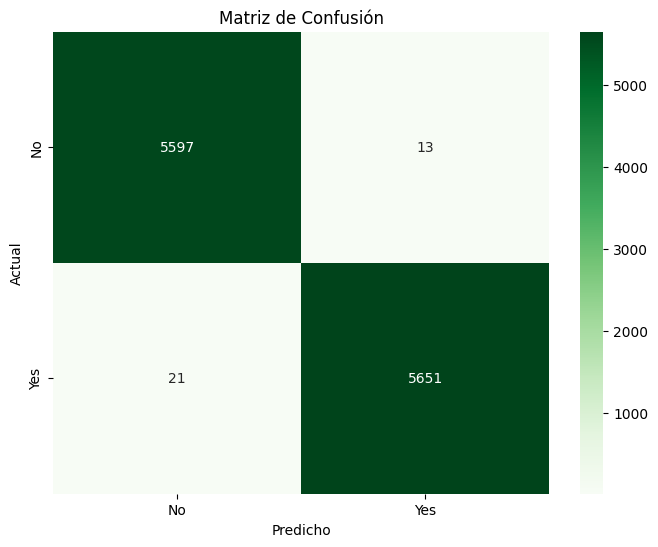

In [43]:
# Gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

In [44]:
conf_matrix

array([[5597,   13],
       [  21, 5651]], dtype=int64)

Esta matriz muestra que el modelo ha clasificado correctamente 2701 clientes que no contratarán la tarjeta de crédito y 1453 clientes que sí la contratarán. Sin embargo, hay 154 falsos positivos (clientes que no contratarán la tarjeta, pero que fueron clasificados como que sí lo harán) y 242 falsos negativos (clientes que sí contratarán la tarjeta, pero que fueron clasificados como que no lo harán).

Considerando que contamos con un conjunto de datos relativamente pequeño, creemos que el modelo es bastante válido para el propósito de identificar a los clientes que podrían estar interesados en contratar una tarjeta de crédito. Aunque hay margen para mejorar, los resultados son lo suficientemente sólidos como para permitirnos buscar la probabilidad de compra de la tarjeta de crédito entre los clientes que no la tienen contratada.

En resumen, el modelo ha demostrado ser efectivo en la clasificación y ofrece una base sólida para enfocar las campañas de marketing hacia los clientes con mayor probabilidad de contratar el producto.

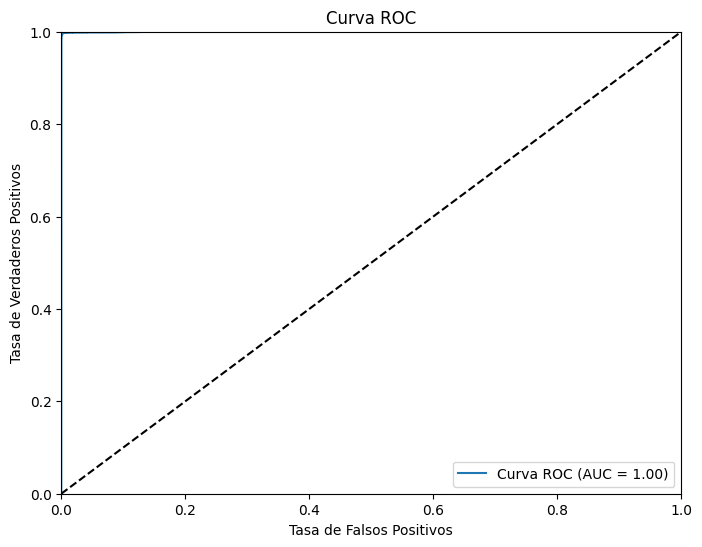

In [45]:
# Gráfico de la curva ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

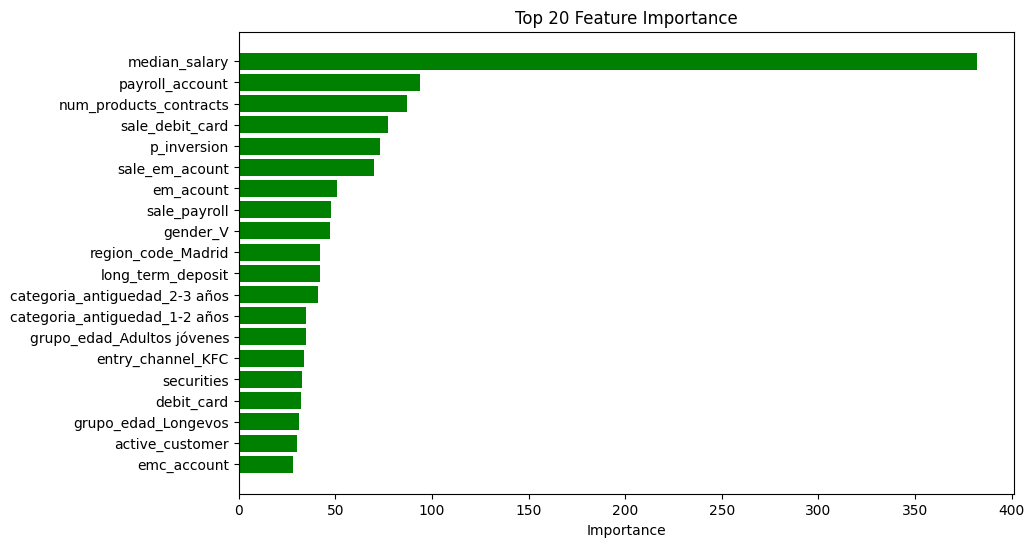

In [46]:
# Obtener la importancia de las características
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convertir a un DataFrame para mejor visualización
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar solo las 20 características más importantes
top_20_importance_df = importance_df.head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(top_20_importance_df['Feature'], top_20_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la más importante en la parte superior
plt.show()

## 15. Importancia de las Características

En nuestro modelo de predicción, hemos identificado varias características que juegan un papel crucial en la determinación de la probabilidad de que un cliente contrate una tarjeta de crédito. A continuación, se presentan las características más importantes, junto con una breve justificación de su relevancia:

1. **Salario (`median_salary`)**:
   - **Importancia**: Esta es la característica más significativa, con una diferencia considerable respecto a las demás.
   - **Justificación**: El salario es un indicador clave de la capacidad financiera de un cliente. Aquellos con un salario más alto suelen tener una mayor capacidad para manejar pagos y deudas, lo que los hace más propensos a contratar productos de crédito. Este factor es fundamental para las entidades financieras, ya que ayuda a evaluar el riesgo de impago.

2. **Productos de Financiación Contratados (`p_financiacion`)**:
   - **Importancia**: Esta característica representa la cantidad de productos de financiación que el cliente tiene contratados.
   - **Justificación**: Los clientes que ya han contratado productos de financiación, como préstamos o hipotecas, pueden ser más propensos a contratar una tarjeta de crédito. Esto se debe a que su historial de crédito y su experiencia con la gestión de deuda son factores que influyen en su decisión de solicitar productos de crédito adicionales.

3. **Número de Productos Contratados (`num_products_contracts`)**:
   - **Importancia**: El total de productos que un cliente ha contratado con la entidad.
   - **Justificación**: Un mayor número de productos contratados indica un compromiso más fuerte con la entidad financiera, lo que puede resultar en una mayor disposición a adquirir nuevos productos. Los clientes que tienen múltiples productos con el banco tienden a confiar más en la institución, lo que aumenta la probabilidad de que consideren productos adicionales, como una tarjeta de crédito.

4. **Venta de Tarjeta de Débito (`sale_debit_card`)**:
   - **Importancia**: La cuarta característica más relevante es si el cliente ha tenido alguna vez una tarjeta de débito.
   - **Justificación**: La posesión de una tarjeta de débito puede indicar una relación previa con la entidad financiera y un comportamiento financiero responsable. Además, los clientes que utilizan productos de débito pueden estar más abiertos a considerar productos de crédito, ya que ya están familiarizados con la gestión de cuentas bancarias.








# Predicciones


Para asegurar que nuestras predicciones sean precisas y reflejen el comportamiento más reciente de los clientes, hemos decidido filtrar el DataFrame utilizando únicamente la última ingesta de datos.

In [47]:
df_ultima_particion

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
5519929,657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.380",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5519930,657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5519931,657986,2019-05-28,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,6,1,4,1,1,1,1,40,40,60,ES,H,5,May,Adultos jóvenes,"100,993.170",Sevilla,2016-02-18,Otros,1,02 - PARTICULARES,Más de 3 años,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0
5519932,657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.090",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5519933,657336,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"108,223.410",Madrid,2019-03-28,KAT,1,02 - PARTICULARES,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"43,912.170",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"87,930.930",Zaragoza,2016-08-14,KHE,1,02 - PARTICULARES,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Jóvenes,"199,592.820",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
df_ultima_particion.set_index('pk_cid', inplace=True)

In [49]:
# Filtrar df_ultima_ingesta para eliminar los clientes que ya están en X_resampled
df__ultima_particion_filtrado = df_ultima_particion[~df_ultima_particion.index.isin(X_resampled.index)]

In [50]:
df__ultima_particion_filtrado

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.380",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.090",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
657147,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,H,5,May,Adultos mayores,"104,881.710",Madrid,2017-06-09,KAT,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658576,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,5,May,Longevos,"81,977.580",Cuenca,2017-05-07,KFC,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166767,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"73,134.810",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166766,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"50,945.250",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [51]:
# Seleccionamos los clientes que no se han usado para el entrenamiento que no han contratado la tajeta de credito 

df_customers_no_pension_plan = df__ultima_particion_filtrado[df__ultima_particion_filtrado['sale_pension_plan'] == 0]


In [52]:
df_customers_no_pension_plan['sale_pension_plan'].value_counts()

sale_pension_plan
0    387752
Name: count, dtype: int64

In [53]:
df_customers_no_pension_plan

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.380",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.090",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
657147,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,H,5,May,Adultos mayores,"104,881.710",Madrid,2017-06-09,KAT,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658576,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,5,May,Longevos,"81,977.580",Cuenca,2017-05-07,KFC,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166767,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"73,134.810",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166766,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"50,945.250",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [54]:
# Obtener las características (X) de los clientes sin plan de pensiones
X_no_pension_plan = df_customers_no_pension_plan.drop(columns=['sale_pension_plan'])

In [55]:
X_no_pension_plan

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.380",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,1
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.090",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,1
657147,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,H,5,May,Adultos mayores,"104,881.710",Madrid,2017-06-09,KAT,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0
658576,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,5,May,Longevos,"81,977.580",Cuenca,2017-05-07,KFC,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166767,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"73,134.810",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166766,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"50,945.250",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [56]:
# Eliminar columnas que no se incluyeron en el modelo de entrenamiento y las que tenian alta correlacion.

X_no_pension_plan.drop('entry_date', axis=1, inplace=True)
X_no_pension_plan.drop('em_account_pp', axis=1, inplace=True)
X_no_pension_plan.drop('sale_em_account_pp', axis=1, inplace=True)
X_no_pension_plan.drop('p_financiacion', axis=1, inplace=True)
X_no_pension_plan.drop('country_id', axis=1, inplace=True)
X_no_pension_plan.drop('pension_plan', axis=1, inplace=True)
X_no_pension_plan.drop('cuentas_sum', axis=1, inplace=True)
X_no_pension_plan.drop('inversion_sum', axis=1, inplace=True)
X_no_pension_plan.drop('financiacion_sum', axis=1, inplace=True)
X_no_pension_plan.drop('profit_cuentas', axis=1, inplace=True)
X_no_pension_plan.drop('profit_inversion', axis=1, inplace=True)
X_no_pension_plan.drop('profit_financiacion', axis=1, inplace=True)
X_no_pension_plan.drop('sale_mortgage', axis=1, inplace=True)
X_no_pension_plan.drop('sale_securities', axis=1, inplace=True)
X_no_pension_plan.drop('sale_payroll_account', axis=1, inplace=True)
X_no_pension_plan.drop('sale_emc_account', axis=1, inplace=True)
X_no_pension_plan.drop('sale_em_account_p', axis=1, inplace=True)

In [57]:
X_no_pension_plan

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,p_inversion,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_funds,sale_long_term_deposit,sale_payroll,sale_debit_card,sale_em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,H,5,May,Adultos,"54,493.380",Lleida,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,1
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0
657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,H,5,May,Longevos,"154,059.090",Madrid,KAT,1,01 - TOP,2-3 años,0,0,0,0,1,0,0,1
657147,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,5,May,Adultos mayores,"104,881.710",Madrid,KAT,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0
658576,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,H,5,May,Longevos,"81,977.580",Cuenca,KFC,1,01 - TOP,2-3 años,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166767,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Adultos jóvenes,"73,134.810",Zaragoza,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,1
1166766,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Adultos jóvenes,"50,945.250",Zaragoza,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,1
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,V,5,May,Jóvenes,"23,334.990","Rioja, La",KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,1,1


In [58]:
# One-Hot Encoding para las variables categóricas
X_no_pension_plan_ohe = pd.DataFrame(ohe.transform(X_no_pension_plan[categorical_cols]), 
                                columns=ohe.get_feature_names_out(categorical_cols), 
                                index=X_no_pension_plan.index)

In [59]:
# Escalar las variables numéricas
X_no_pension_plan_scaled = pd.DataFrame(scaler.transform(X_no_pension_plan[numerical_cols]), 
                                       columns=numerical_cols, 
                                       index=X_no_pension_plan.index)

In [60]:
# Combinar las columnas procesadas
X_no_pension_plan_processed = pd.concat([X_no_pension_plan_scaled, X_no_pension_plan_ohe], axis=1)

In [61]:
X_no_pension_plan_processed

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,p_inversion,mes_partition,median_salary,active_customer,sale_credit_card,sale_short_term_deposit,sale_loans,sale_funds,sale_long_term_deposit,sale_payroll,sale_debit_card,sale_em_acount,gender_V,mes_nombre_partition_August,mes_nombre_partition_December,mes_nombre_partition_February,mes_nombre_partition_January,mes_nombre_partition_July,mes_nombre_partition_March,mes_nombre_partition_May,mes_nombre_partition_November,mes_nombre_partition_October,mes_nombre_partition_September,grupo_edad_Adultos jóvenes,grupo_edad_Adultos mayores,grupo_edad_Ancianos,grupo_edad_Jóvenes,grupo_edad_Longevos,grupo_edad_Menores,region_code_Alicante,region_code_Almería,region_code_Asturias,region_code_Badajoz,"region_code_Baleares, Islas",region_code_Barcelona,...,region_code_Granada,region_code_Guadalajara,region_code_Huelva,region_code_Huesca,region_code_Jaén,region_code_León,region_code_Lleida,region_code_Lugo,region_code_Madrid,region_code_Melilla,region_code_Murcia,region_code_Málaga,region_code_Navarra,region_code_Ourense,region_code_Palencia,"region_code_Palmas, Las",region_code_Pontevedra,"region_code_Rioja, La",region_code_Salamanca,region_code_Santa Cruz de Tenerife,region_code_Segovia,region_code_Sevilla,region_code_Soria,region_code_Tarragona,region_code_Teruel,region_code_Toledo,region_code_Valencia,region_code_Valladolid,region_code_Zamora,region_code_Zaragoza,region_code_Álava,region_code_Ávila,entry_channel_KFA,entry_channel_KFC,entry_channel_KHD,entry_channel_KHE,entry_channel_KHK,entry_channel_KHM,entry_channel_KHN,entry_channel_KHQ,entry_channel_Otros,entry_channel_RED,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,categoria_antiguedad_1-2 años,categoria_antiguedad_2-3 años,categoria_antiguedad_3-6 meses,categoria_antiguedad_6-9 meses,categoria_antiguedad_9-12 meses,categoria_antiguedad_Más de 3 años
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.585,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
657817,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.500,-1.000,0.000,0.000,0.530,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
657905,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.500,0.000,1.000,0.000,1.107,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
657147,0.000,0.000,0.000,0.00

In [62]:
# Predecir las probabilidades para los clientes sin tarjeta de crédito
probabilities_no_pension_plan = xgb_model.predict_proba(X_no_pension_plan_processed)[:, 1]

In [63]:
# Agregar las probabilidades al DataFrame original
df_customers_no_pension_plan['probability'] = probabilities_no_pension_plan

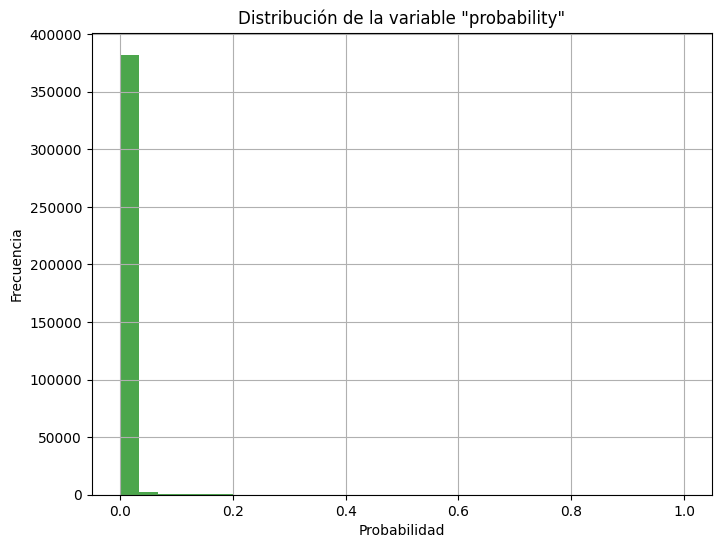

In [64]:
# Graficamos la distribución
plt.figure(figsize=(8,6))
plt.hist(data= df_customers_no_pension_plan, x='probability', bins=30, color='green', alpha=0.7)
plt.title('Distribución de la variable "probability"')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Como podemos observar en la gráfica de la distribución de la variable "probability", la mayoría de los clientes que no tienen la tarjeta de crédito contratada presentan una probabilidad baja de adquirirla, con muchas de estas probabilidades cercanas a 0. Este comportamiento es esperado, ya que una parte significativa de nuestra base de clientes probablemente no está interesada en contratar este producto o no presenta las características necesarias para que el modelo prediga una alta probabilidad de conversión.

Sin embargo, el objetivo de nuestra campaña de marketing no es abarcar a todos los clientes, sino identificar a aquellos que tienen la mayor probabilidad de adquirir la tarjeta de crédito. Para ello, nos hemos centrado en seleccionar los 10,000 clientes con las probabilidades más altas, ya que estos representan la mejor oportunidad para maximizar la efectividad de la campaña de email. Evaluar a estos clientes con mayor detalle nos permitirá enfocar los recursos en un grupo reducido, pero más propenso a la conversión.

In [65]:
df_customers_no_pension_plan

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount,probability
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
657826,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos,"54,493.380",Lleida,2015-05-24,Otros,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.063
657817,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Adultos jóvenes,"120,141.600",Barcelona,2019-05-12,Otros,0,03 - UNIVERSITARIO,0-3 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
657905,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,10,40,0,ES,H,5,May,Longevos,"154,059.090",Madrid,2017-02-07,KAT,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.003
657147,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,H,5,May,Adultos mayores,"104,881.710",Madrid,2017-06-09,KAT,0,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005
658576,2019-05-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,40,0,ES,H,5,May,Longevos,"81,977.580",Cuenca,2017-05-07,KFC,1,01 - TOP,2-3 años,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166767,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"73,134.810",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000
1166766,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Adultos jóvenes,"50,945.250",Zaragoza,2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000
1166764,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,10,0,0,ES,V,5,May,Jóvenes,"23,334.990","Rioja, La",2016-08-14,KHE,0,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.000


In [66]:
df_sorted = df_customers_no_pension_plan.sort_values(by='probability', ascending=False)

In [67]:
df_sorted

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount,probability
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1248422,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,3,1,2,1,1,0,0,20,40,0,ES,H,5,May,Adultos,"38,994.240",Murcia,2017-03-14,KFC,1,01 - TOP,2-3 años,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.999
1011388,2019-05-28,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,4,1,3,0,0,1,1,30,0,60,ES,V,5,May,Ancianos,"54,403.380",Huelva,2015-04-05,KAT,1,02 - PARTICULARES,Más de 3 años,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0.998
1233449,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos mayores,"232,731.180",Burgos,2016-12-20,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0.997
1208725,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,3,1,2,1,1,0,0,20,40,0,ES,V,5,May,Ancianos,"169,202.010",Madrid,2017-03-17,KFA,1,02 - PARTICULARES,2-3 años,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.996
1347123,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos jóvenes,"52,392.840",Murcia,2018-08-18,KHK,1,02 - PARTICULARES,9-12 meses,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518162,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Jóvenes,"76,424.790",Albacete,2018-12-22,KHQ,0,03 - UNIVERSITARIO,3-6 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1512065,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Jóvenes,"76,424.790",Albacete,2018-12-01,KHQ,0,03 - UNIVERSITARIO,3-6 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1513068,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,V,5,May,Jóvenes,"76,424.790",Albacete,2018-12-03,KHQ,0,03 - UNIVERSITARIO,3-6 meses,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000


In [68]:
# Seleccionar los 10,000 clientes sin tarjeta de crédito con mayor probabilidad de compra
top_customers_no_pension_plan = df_customers_no_pension_plan.nlargest(10000, 'probability')

In [69]:
top_customers_no_pension_plan

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount,probability
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1248422,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,3,1,2,1,1,0,0,20,40,0,ES,H,5,May,Adultos,"38,994.240",Murcia,2017-03-14,KFC,1,01 - TOP,2-3 años,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.999
1011388,2019-05-28,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,4,1,3,0,0,1,1,30,0,60,ES,V,5,May,Ancianos,"54,403.380",Huelva,2015-04-05,KAT,1,02 - PARTICULARES,Más de 3 años,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0.998
1233449,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos mayores,"232,731.180",Burgos,2016-12-20,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0.997
1208725,2019-05-28,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,3,1,2,1,1,0,0,20,40,0,ES,V,5,May,Ancianos,"169,202.010",Madrid,2017-03-17,KFA,1,02 - PARTICULARES,2-3 años,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.996
1347123,2019-05-28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,10,0,0,ES,H,5,May,Adultos jóvenes,"52,392.840",Murcia,2018-08-18,KHK,1,02 - PARTICULARES,9-12 meses,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470452,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,0,20,0,0,ES,V,5,May,Adultos mayores,"67,650.540",Murcia,2018-10-06,KHM,1,02 - PARTICULARES,6-9 meses,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.017
1468527,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,0,20,0,0,ES,V,5,May,Adultos mayores,"67,650.540",Murcia,2018-10-03,KHM,1,02 - PARTICULARES,6-9 meses,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.017
1452028,2019-05-28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,0,20,0,0,ES,V,5,May,Adultos mayores,"67,650.540",Murcia,2018-09-16,KHM,1,02 - PARTICULARES,6-9 meses,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.017


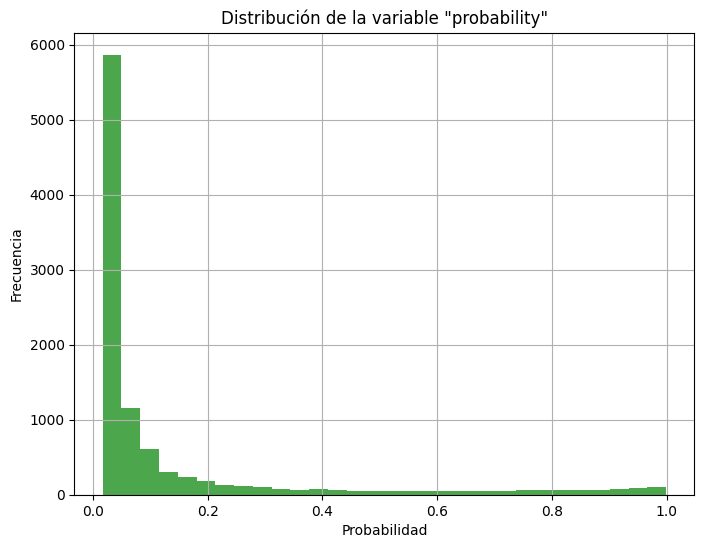

In [70]:
# Graficamos la distribución
plt.figure(figsize=(8,6))
plt.hist(data= top_customers_no_pension_plan, x='probability', bins=30, color='green', alpha=0.7)
plt.title('Distribución de la variable "probability"')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


La distribución de la variable "probability" muestra que la mayoría de los 10,000 clientes con mayor probabilidad de contratar la tarjeta de crédito se encuentran en un rango de probabilidad entre 0.7 y 0.85, con una tendencia descendente hacia probabilidades más altas. Esto sugiere que, aunque tenemos un número considerable de clientes con probabilidades moderadamente altas, hay menos clientes con probabilidades extremadamente altas (mayores a 0.95).

En la siguiente tarea, se procederá a realizar una clusterización de estos 10,000 clientes. Esto nos permitirá personalizar las creatividades de los correos electrónicos que se enviarán, ajustando el mensaje para diferentes grupos de clientes según su perfil y probabilidad de conversión.